In [99]:
import pandas as pd
df = pd.read_csv('gender.csv', encoding='cp949')
df.head()

,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,남_3세,남_4세,남_5세,남_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,서울특별시 (1100000000),4773605,4773605,27977,30473,33735,36145,35828,35485,38974,...,5394,4054,3072,2187,2069,1664,1138,828,622,4435
1,서울특별시 종로구 (1111000000),74662,74662,318,334,395,434,435,426,501,...,114,86,71,55,41,49,31,24,24,161
2,서울특별시 종로구 청운효자동(1111051500),6088,6088,27,39,36,55,53,44,50,...,4,4,9,3,3,4,2,2,2,13
3,서울특별시 종로구 사직동(1111053000),4313,4313,19,30,27,34,33,37,41,...,10,3,8,2,5,6,1,3,2,14
4,서울특별시 종로구 삼청동(1111054000),1328,1328,6,6,2,9,7,4,2,...,5,2,0,2,0,1,0,0,2,7


In [100]:
df_dongne = df['행정구역'].str.split('(')
df_dongne2 = df_dongne.str.get(0)
df_dongne3 = df_dongne2.str.split(" ")
df['시도'] = df_dongne3.str.get(0)
df['구시'] = df_dongne3.str.get(1)
df['동'] = df_dongne3.str.get(2)

In [101]:
df_city = df[['행정구역','시도','구시','동']]

In [125]:
df[['행정구역','시도','구시','동']] = df_city

In [139]:
df.iloc[:,1:3].iloc[:,1]

0       4773605
1         74662
2          6088
3          4313
4          1328
5          4839
6          8859
7          3953
8          4987
9          2060
10         4372
11         2845
12         3845
13         8239
14         2897
15         4471
16         3548
17         3125
18         4893
19        62048
20          995
21         2927
22         1185
23         2107
24         2406
25         2620
26         1084
27         3868
28         7101
29         8358
         ...   
3811       7751
3812       4867
3813      12413
3814      12578
3815       2660
3816      16665
3817       7511
3818      20332
3819      26462
3820      10849
3821       2331
3822       1636
3823      91712
3824      10466
3825       9763
3826       8109
3827       6100
3828       6332
3829       2309
3830       1166
3831       1847
3832       1816
3833       2687
3834       2707
3835      11241
3836       5216
3837       7177
3838       6929
3839       5731
3840       2116
Name: 남_연령구간인구수, Length:

In [103]:
gender_male = df.iloc[:,2:22].sum(axis=1).sort_values(ascending=False)

In [104]:
gender_female = df.iloc[:,106:125].sum(axis=1).sort_values(ascending=False)

In [123]:
df_male =  pd.merge(df_city,gender_male,on='행정구역',how='left')

ValueError: Cannot merge a Series without a name

In [119]:
df_total =  pd.concat([df_male,gender_female],axis=1,keys=['행정구역','시도','구시','동','남','여'])

AssertionError: Cannot concat indices that do not have the same number of levels

In [115]:
df_seoul = df_total[df_total['시도'] == '서울특별시']

KeyError: '시도'

In [120]:
df_male

행정구역                                   시도
                                   행정구역       시도    구시            동        0
0                   서울특별시  (1100000000)    서울특별시                     5507071
1                서울특별시 종로구 (1111000000)    서울특별시   종로구                 84335
2           서울특별시 종로구 청운효자동(1111051500)    서울특별시   종로구        청운효자동     7215
3             서울특별시 종로구 사직동(1111053000)    서울특별시   종로구          사직동     4966
4             서울특별시 종로구 삼청동(1111054000)    서울특별시   종로구          삼청동     1500
5             서울특별시 종로구 부암동(1111055000)    서울특별시   종로구          부암동     5594
6             서울특별시 종로구 평창동(1111056000)    서울특별시   종로구          평창동    10294
7             서울특별시 종로구 무악동(1111057000)    서울특별시   종로구          무악동     4720
8             서울특별시 종로구 교남동(1111058000)    서울특별시   종로구          교남동     5840
9             서울특별시 종로구 가회동(1111060000)    서울특별시   종로구          가회동     2342
10    서울특별시 종로구 종로1.2.3.4가동(1111061500)    서울특별시   종로구  종로1.2.3.4가동     4611
11        서울특별시 종로구 종로5.6가동(1111063000)    서울특별시   종로구      종로5.6가동     3025
12            서울특별시 종로구 이화동(1111064000)    서울특별시   종로구          이화동     4210
13            서울특별시 종로구 혜화동(1111065000)    서울특별시   종로구          혜화동     9218
14          서울특별시 종로구 창신제1동(1111067000)    서울특별시   종로구        창신제1동     3109
15          서울특별시 종로구 창신제2동(1111068000)    서울특별시   종로구        창신제2동     4907
16          서울특별시 종로구 창신제3동(1111069000)    서울특별시   종로구        창신제3동     4048
17          서울특별시 종로구 숭인제1동(1111070000)    서울특별시   종로구        숭인제1동     3485
18          서울특별시 종로구 숭인제2동(1111071000)    서울특별시   종로구        숭인제2동     5251
19                서울특별시 중구 (1114000000)    서울특별시    중구                 69203
20             서울특별시 중구 소공동(1114052000)    서울특별시    중구          소공동     1115
21             서울특별시 중구 회현동(1114054000)    서울특별시    중구          회현동     3127
22              서울특별시 중구 명동(1114055000)    서울특별시    중구           명동     1287
23              서울특별시 중구 필동(1114057000)    서울특별시    중구           필동     2315
24             서울특별시 중구 장충동(1114058000)    서울특별시    중구          장충동     2646
25             서울특별시 중구 광희동(1114059000)    서울특별시    중구          광희동     2797
26            서울특별시 중구 을지로동(1114060500)    서울특별시    중구         을지로동     1128
27             서울특별시 중구 신당동(1114061500)    서울특별시    중구          신당동     4148
28             서울특별시 중구 다산동(1114062500)    서울특별시    중구          다산동     7891
29             서울특별시 중구 약수동(1114063500)    서울특별시    중구          약수동     9486
...                                 ...      ...   ...          ...      ...
3811       제주특별자치도 제주시 용담2동(5011058000)  제주특별자치도   제주시         용담2동     9076
3812        제주특별자치도 제주시 건입동(5011059000)  제주특별자치도   제주시          건입동     5620
3813        제주특별자치도 제주시 화북동(5011060000)  제주특별자치도   제주시          화북동    15354
3814        제주특별자치도 제주시 삼양동(5011061000)  제주특별자치도   제주시          삼양동    15987
3815        제주특별자치도 제주시 봉개동(5011062000)  제주특별자치도   제주시          봉개동     3167
3816        제주특별자치도 제주시 아라동(5011063000)  제주특별자치도   제주시          아라동    20653
3817        제주특별자치도 제주시 오라동(5011064000)  제주특별자치도   제주시          오라동     9454
3818         제주특별자치도 제주시 연동(5011065000)  제주특별자치도   제주시           연동    24169
3819        제주특별자치도 제주시 노형동(5011066000)  제주특별자치도   제주시          노형동    33036
3820        제주특별자치도 제주시 외도동(5011067000)  제주특별자치도   제주시          외도동    13758
3821        제주특별자치도 제주시 이호동(5011068000)  제주특별자치도   제주시          이호동     2758
3822        제주특별자치도 제주시 도두동(5011069000)  제주특별자치도   제주시          도두동     1910
3823          제주특별자치도 서귀포시 (5013000000)  제주특별자치도  서귀포시                107753
3824       제주특별자치도 서귀포시 대정읍(5013025000)  제주특별자치도  서귀포시          대정읍    12575
3825       제주특별자치도 서귀포시 남원읍(5013025300)  제주특별자치도  서귀포시          남원읍    11199
3826       제주특별자치도 서귀포시 성산읍(5013025900)  제주특별자치도  서귀포시          성산읍     9102
3827       제주특별자치도 서귀포시 안덕면(5013031000)  제주특별자치도  서귀포시          안덕면     6977
3828       제주특별자치도 서귀포시 표선면(5013032000)  제주특별자치도  서귀포시          표선면     7236
3829       제주특별자치도 서귀포시 송산동(5013051000)  제주특별자치도  서귀포시          송산동     2653
3830       제주특별자치도 서귀포시 정방동(501

In [111]:
df_seoul[0]

,0,0
0,5507071,692835
1,84335,9389
2,7215,1009
3,4966,697
4,1500,149
5,5594,683
6,10294,1365
7,4720,880
8,5840,866
9,2342,265


In [34]:
import matplotlib.pyplot as plt

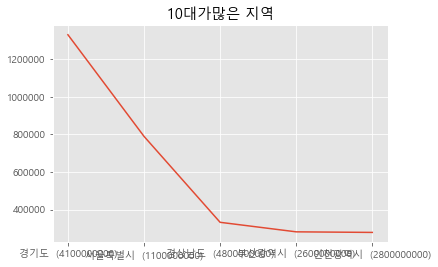

In [38]:
plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
plt.title('10대가많은 지역')
plt.plot(gender_male)
plt.show()

In [51]:
df_dongne = df['행정구역'].str.split('(')

In [55]:
df_dongne2 = df_dongne.str.get(0)

In [57]:
df_dongne3 = df_dongne2.str.split(" ")

In [58]:
df_dongne3.str.get(0)

0         서울특별시
1         서울특별시
2         서울특별시
3         서울특별시
4         서울특별시
5         서울특별시
6         서울특별시
7         서울특별시
8         서울특별시
9         서울특별시
10        서울특별시
11        서울특별시
12        서울특별시
13        서울특별시
14        서울특별시
15        서울특별시
16        서울특별시
17        서울특별시
18        서울특별시
19        서울특별시
20        서울특별시
21        서울특별시
22        서울특별시
23        서울특별시
24        서울특별시
25        서울특별시
26        서울특별시
27        서울특별시
28        서울특별시
29        서울특별시
         ...   
3811    제주특별자치도
3812    제주특별자치도
3813    제주특별자치도
3814    제주특별자치도
3815    제주특별자치도
3816    제주특별자치도
3817    제주특별자치도
3818    제주특별자치도
3819    제주특별자치도
3820    제주특별자치도
3821    제주특별자치도
3822    제주특별자치도
3823    제주특별자치도
3824    제주특별자치도
3825    제주특별자치도
3826    제주특별자치도
3827    제주특별자치도
3828    제주특별자치도
3829    제주특별자치도
3830    제주특별자치도
3831    제주특별자치도
3832    제주특별자치도
3833    제주특별자치도
3834    제주특별자치도
3835    제주특별자치도
3836    제주특별자치도
3837    제주특별자치도
3838    제주특별자치도
3839    제주특별자치도
3840    제주특별자치도
Name: 행정구역, Length: 3841

In [60]:
df['시도'] = df_dongne3.str.get(0)
df['구시'] = df_dongne3.str.get(1)
df['동'] = df_dongne3.str.get(2)

In [75]:
df_city = df[['행정구역','시도','구시','동']]

,행정구역,시도,구시,동,행정구역,남_총인구수,남_연령구간인구수,남_0세,남_1세,남_2세,...,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상,시도,구시,동
0,서울특별시 (1100000000),서울특별시,,,서울특별시 (1100000000),4773605,4773605,27977,30473,33735,...,2187,2069,1664,1138,828,622,4435,서울특별시,,
1,서울특별시 종로구 (1111000000),서울특별시,종로구,,서울특별시 종로구 (1111000000),74662,74662,318,334,395,...,55,41,49,31,24,24,161,서울특별시,종로구,
2,서울특별시 종로구 청운효자동(1111051500),서울특별시,종로구,청운효자동,서울특별시 종로구 청운효자동(1111051500),6088,6088,27,39,36,...,3,3,4,2,2,2,13,서울특별시,종로구,청운효자동
3,서울특별시 종로구 사직동(1111053000),서울특별시,종로구,사직동,서울특별시 종로구 사직동(1111053000),4313,4313,19,30,27,...,2,5,6,1,3,2,14,서울특별시,종로구,사직동
4,서울특별시 종로구 삼청동(1111054000),서울특별시,종로구,삼청동,서울특별시 종로구 삼청동(1111054000),1328,1328,6,6,2,...,2,0,1,0,0,2,7,서울특별시,종로구,삼청동
5,서울특별시 종로구 부암동(1111055000),서울특별시,종로구,부암동,서울특별시 종로구 부암동(1111055000),4839,4839,18,21,26,...,5,3,4,4,3,0,7,서울특별시,종로구,부암동
6,서울특별시 종로구 평창동(1111056000),서울특별시,종로구,평창동,서울특별시 종로구 평창동(1111056000),8859,8859,47,50,50,...,9,7,12,5,3,5,16,서울특별시,종로구,평창동
7,서울특별시 종로구 무악동(1111057000),서울특별시,종로구,무악동,서울특별시 종로구 무악동(1111057000),3953,3953,14,22,34,...,1,3,1,3,1,1,5,서울특별시,종로구,무악동
8,서울특별시 종로구 교남동(1111058000),서울특별시,종로구,교남동,서울특별시 종로구 교남동(1111058000),4987,4987,46,44,53,...,4,4,1,3,0,2,8,서울특별시,종로구,교남동
9,서울특별시 종로구 가회동(1111060000),서울특별시,종로구,가회동,서울특별시 종로구 가회동(1111060000),2060,2060,9,8,11,...,4,0,1,2,0,1,5,서울특별시,종로구,가회동
